# MODELLING

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
final_df = pd.read_csv('/final_df_clean_binned', index_col=0)

## Dummifying data

As the all features are now categorical, they were all dummified (similar to one-hot encoding) for the modelling step. This ensures all datapoints are labelled 1 or 0 within each feature. This expanded the df to 42,000 columns.

In [3]:
df_dum = pd.get_dummies(final_df, columns = ['FRACTION_GENOME_ALTERED',
 'MUTATION_COUNT',
 'SAMPLE_TYPE',
 'SOMATIC_STATUS',
 'PLOIDY',
 'PURITY',
 'SAMPLE_CLASS',
 'MSI_STATUS',
 'SEQUENCING_TYPE',
 'GENOME_DOUBLINGS',
 'MUTATION_RATE',
 'TUMOR_STAGE',
 'TUMOR_SIZE',
 'GRADE',
 'MOLECULAR_SUBTYPE',
 'ER_STATUS',
 'HER2_STATUS',
 'PR_STATUS',
 'TUMOR_PURITY',
 'ABSOLUTE_EXTRACT_PLOIDY',
 'HER2_IHC_SCORE',
 'SPECIMEN_TYPE',
 'STAGE_AT_DIAGNOSIS',
 'MSI_SCORE',
 'METHYLATION_CLUSTER',
 'DNA_INPUT',
 'MATCHED_STATUS',
 'SAMPLE_COVERAGE',
 'MSI_SENSOR_SCORE',
 'AGE_AT_SEQ_REPORT',
 'CVR_TMB_SCORE',
 'ARCHER',
 'MSI_TYPE',
 'MLL_STATUS',
 'LONGEST_DIMENSION',
 'SHORTEST_DIMENSION',
 'SPECIMEN_SECOND_LONGEST_DIMENSION',
 'ANEUPLOIDY_SCORE',
 'STATUS_10P',
 'STATUS_10Q',
 'STATUS_11P',
 'STATUS_11Q',
 'STATUS_12P',
 'STATUS_14_14Q',
 'STATUS_16P',
 'STATUS_16Q',
 'STATUS_17P',
 'STATUS_17Q',
 'STATUS_18P',
 'STATUS_18Q',
 'STATUS_19Q',
 'STATUS_1P',
 'STATUS_1Q',
 'STATUS_20P',
 'STATUS_21_21Q',
 'STATUS_22_22Q',
 'STATUS_2P',
 'STATUS_2Q',
 'STATUS_3P',
 'STATUS_4P',
 'STATUS_4Q',
 'STATUS_5P',
 'STATUS_5Q',
 'STATUS_6P',
 'STATUS_6Q',
 'STATUS_7P',
 'STATUS_7Q',
 'STATUS_8P',
 'STATUS_8Q',
 'STATUS_9Q',
 'MSI_SCORE_MANTIS',
 'STATUS_12Q',
 'STATUS_13_13Q',
 'STATUS_15_15Q',
 'STATUS_19P',
 'STATUS_20Q',
 'STATUS_3Q',
 'STATUS_9P',
 'SAMPLE_INITIAL_WEIGHT',
 'OVERALL_SURVIVAL_MONTHS',
 'OVERALL_SURVIVAL_STATUS',
 'NUMBER_OF_SAMPLES_PER_PATIENT',
 'SEX',
 'SMOKING_HISTORY',
 'PATIENT_VITAL_STATUS',
 'Age',
 'Alkylating Agent Treatment',
 'All therapy at MSKCC',
 'Anthracycline Treatment',
 'Antimetobolite Treatment',
 'Carboplatin Treatment',
 'Chemotherapy Treatment',
 'Cisplatin Treatment',
 'Cytotoxic Chemotherapy Treatment',
 'EQD Tertiles',
 'Folic Acid Analog Treatment',
 'Immunotherapy Treatment',
 'Microtubule Damaging Agent',
 'Nucleoside Analogue Treatment',
 'Other Cytotoxic Treatment',
 'Oxaliplatin Treatment',
 'Platinum Treatment',
 'Race',
 'Radiotherapy Treatment',
 'Smoking Status',
 'Targeted Therapy Treatment',
 'Taxane Treatment',
 'Cumulative Exposure to Alkylatin Agent',
 'Cumulative Exposure to Anthracycline',
 'Cumulative Exposure to Antimetabolite',
 'Cumulative Exposure to Carboplatin',
 'Cumulative Exposure to Cisplatin',
 'Cytotoxic Chemotherapy Treatment Tertile',
 'Cumulative Exposure to  Immunotherapy',
 'Cumulative Exposure to Microtubule Damaging Agent',
 'Cumulative Exposure to Other Cytotoxic Therapy',
 'Cumulative Exposure to Oxaliplatin',
 'Cumulative Exposure to Platinum',
 'Cumulative Exposure to Targeted Therapy',
 'Cumulative Exposure to Taxane',
 'Cumulative Exposure to Topoisomerase II Inhibitor',
 'Cumulative Exposure to Topoisomerase I Inhibitor',
 'Time from Diagnosis',
 'Time to Blood Draw from Treatment',
 'Topoisomerase II Inhibitor Treatment',
 'Topoisomerase I Inhibitor Treatment',
 'Treatment Status',
 'Radiation Therapy'], drop_first=True)

In [4]:
df_dum.shape

(84609, 939)

## Setting X and y 

The target (y/cancer type) and the X variables were set ready for modelling.

In [4]:
y = df_dum.pop('CANCER_TYPE')

In [5]:
X=df_dum

## Determining baseline

The baseline score was calculated as a means of assessing the predictive power of any models over chance.

In [6]:
y.value_counts(normalize=True)

breast                   0.127291
digestive                0.107270
lung                     0.106336
leukemia_and_lymphoma    0.084187
prostate                 0.075453
head_neck                0.073680
CNS                      0.070808
other                    0.056022
immune                   0.049274
reproductive             0.046544
skin                     0.044097
kidney                   0.037537
pancreas                 0.035327
sarcoma                  0.028779
liver                    0.022953
blood                    0.020872
bone                     0.009361
adrenal                  0.004208
Name: CANCER_TYPE, dtype: float64

## Train/test split

The data was split into train and test sets using a 80% : 20% (train:test). This split could be modified further (as long as the proportion of data in the train set is higher than test).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=1)

## Decision tree model

A gridsearch was used to optimise the hyperparameters of the decition tree model. 

In [10]:
dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01]}

# set the gridsearch
model_decision_tree =DecisionTreeClassifier()
dtc_gs = GridSearchCV(model_decision_tree, dtc_params, cv=5, verbose=3, n_jobs=-2)

In [11]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1936 candidates, totalling 9680 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-2)]: Done 106 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-2)]: Done 266 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-2)]: Done 490 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 1130 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 1546 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-2)]: Done 2026 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-2)]: Done 2570 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-2)]: Done 3178 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-2)]: Done 3850 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-2)]: Done 4586 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-2)]: Done 5386 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-2)]: Done 6250 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-2)]: Done 7178 tasks      | 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-2,
             param_grid={'ccp_alpha': [0, 0.001, 0.005, 0.01],
                 

In [12]:
import joblib

# joblib.dump(dtc_gs, 'dtc_grid_15th_march.jlib')

['dtc_grid_15th_march.jlib']

In [13]:
dtc_grid = joblib.load('file_name.jlib')

### Decision tree evaluation metrics

In [15]:
import scikitplot as skplt
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(dtc_grid
                                                    .classes_)))

In [17]:
dtc_grid_best=dtc_grid.best_estimator_

print('mean cv train score:', dtc_grid.best_score_)
print('train score:',dtc_grid.score(X_train, y_train))
print('test score:',dtc_grid.score(X_test, y_test))

mean cv train score: 0.62243872942444
train score: 0.6841195502829199
test score: 0.6277626758066422


In [18]:
predictions_train = dtc_grid_best.predict(X_train)
predictions_test = dtc_grid_best.predict(X_test)

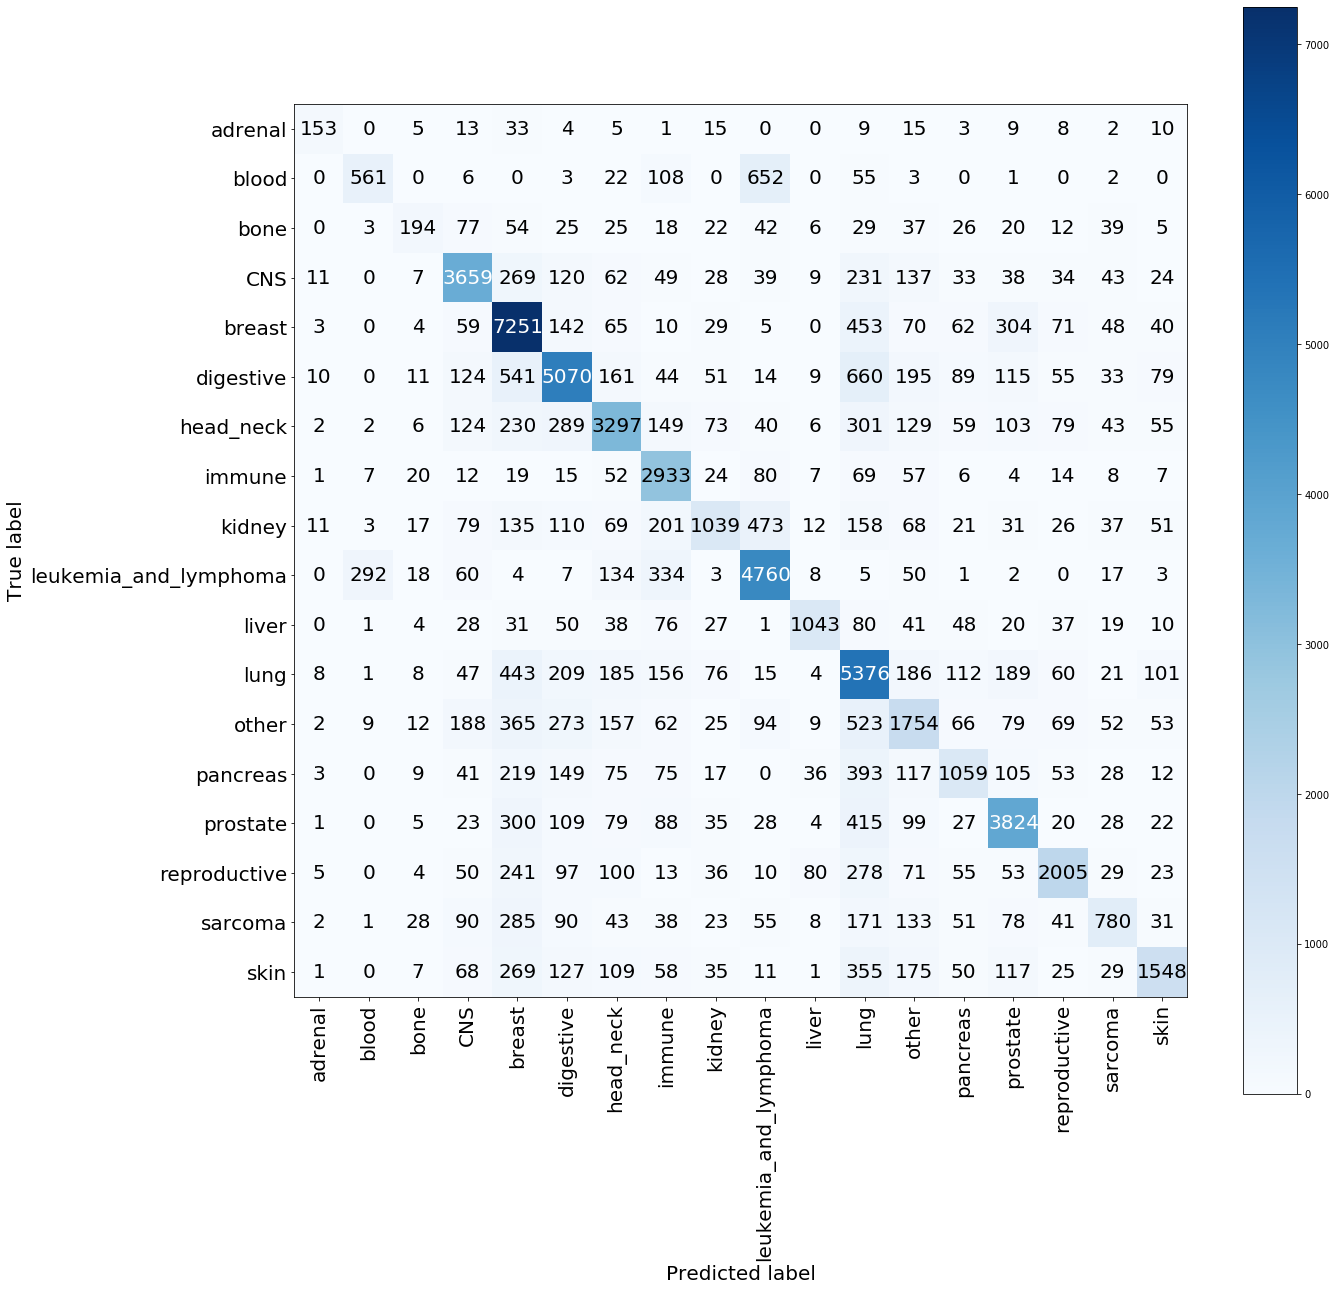

In [19]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, labels=['adrenal',
'blood',
'bone',
'CNS',
'breast',
'digestive',
'head_neck',
'immune',
'kidney',
'leukemia_and_lymphoma',
'liver',
'lung',
'other',
'pancreas',
'prostate',
'reproductive',
'sarcoma',
'skin'], figsize=(20,20),text_fontsize=20, x_tick_rotation=90, title=' ')
plt.show()

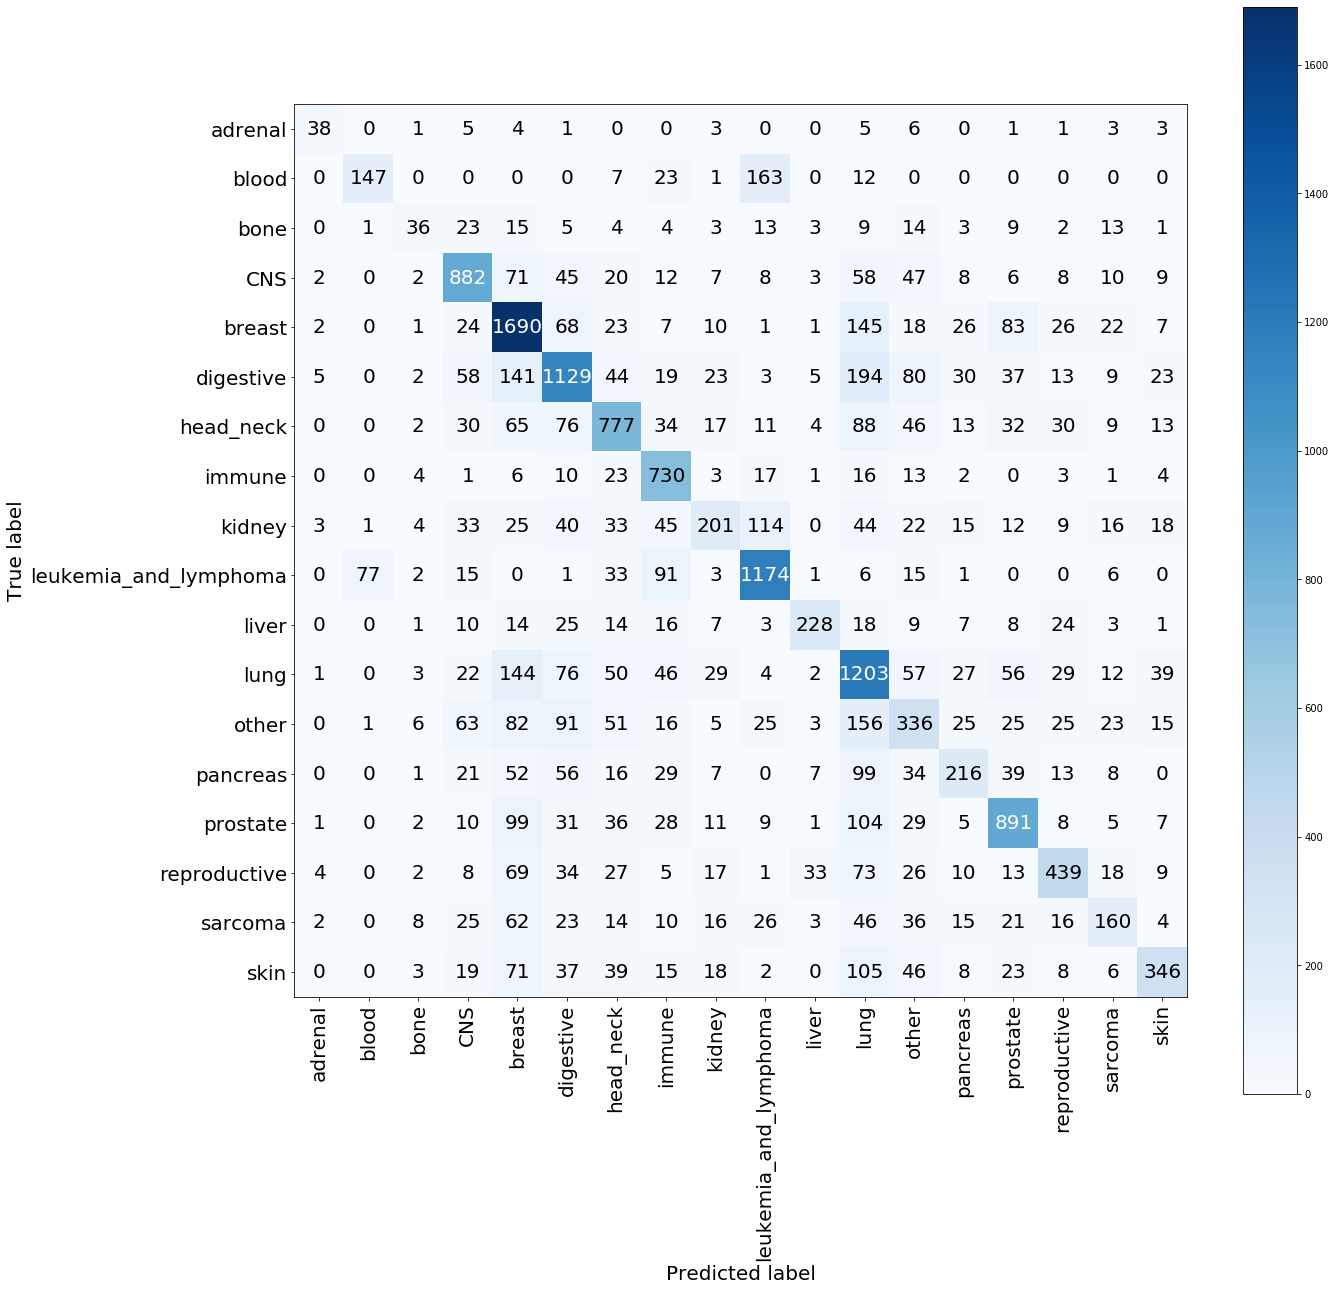

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=['adrenal',
'blood',
'bone',
'CNS',
'breast',
'digestive',
'head_neck',
'immune',
'kidney',
'leukemia_and_lymphoma',
'liver',
'lung',
'other',
'pancreas',
'prostate',
'reproductive',
'sarcoma',
'skin'], figsize=(20,20),text_fontsize=20, x_tick_rotation=90, title=' ')
plt.show()

In [21]:
print(classification_report(y_train, predictions_train))

                       precision    recall  f1-score   support

                  CNS       0.77      0.76      0.77      4793
              adrenal       0.72      0.54      0.61       285
                blood       0.64      0.40      0.49      1413
                 bone       0.54      0.31      0.39       634
               breast       0.68      0.84      0.75      8616
            digestive       0.74      0.70      0.72      7261
            head_neck       0.70      0.66      0.68      4987
               immune       0.66      0.88      0.76      3335
               kidney       0.67      0.41      0.51      2541
leukemia_and_lymphoma       0.75      0.84      0.79      5698
                liver       0.84      0.67      0.75      1554
                 lung       0.56      0.75      0.64      7197
                other       0.53      0.46      0.49      3792
             pancreas       0.60      0.44      0.51      2391
             prostate       0.75      0.75      0.75  

In [22]:
print(classification_report(y_test, predictions_test))

                       precision    recall  f1-score   support

                  CNS       0.71      0.74      0.72      1198
              adrenal       0.66      0.54      0.59        71
                blood       0.65      0.42      0.51       353
                 bone       0.45      0.23      0.30       158
               breast       0.65      0.78      0.71      2154
            digestive       0.65      0.62      0.63      1815
            head_neck       0.64      0.62      0.63      1247
               immune       0.65      0.88      0.74       834
               kidney       0.53      0.32      0.40       635
leukemia_and_lymphoma       0.75      0.82      0.78      1425
                liver       0.77      0.59      0.67       388
                 lung       0.51      0.67      0.58      1800
                other       0.40      0.35      0.38       948
             pancreas       0.53      0.36      0.43       598
             prostate       0.71      0.70      0.70  

In [23]:
probabilities_train = dtc_grid_best.predict_proba(X_train)
probabilities_test = dtc_grid_best.predict_proba(X_test)

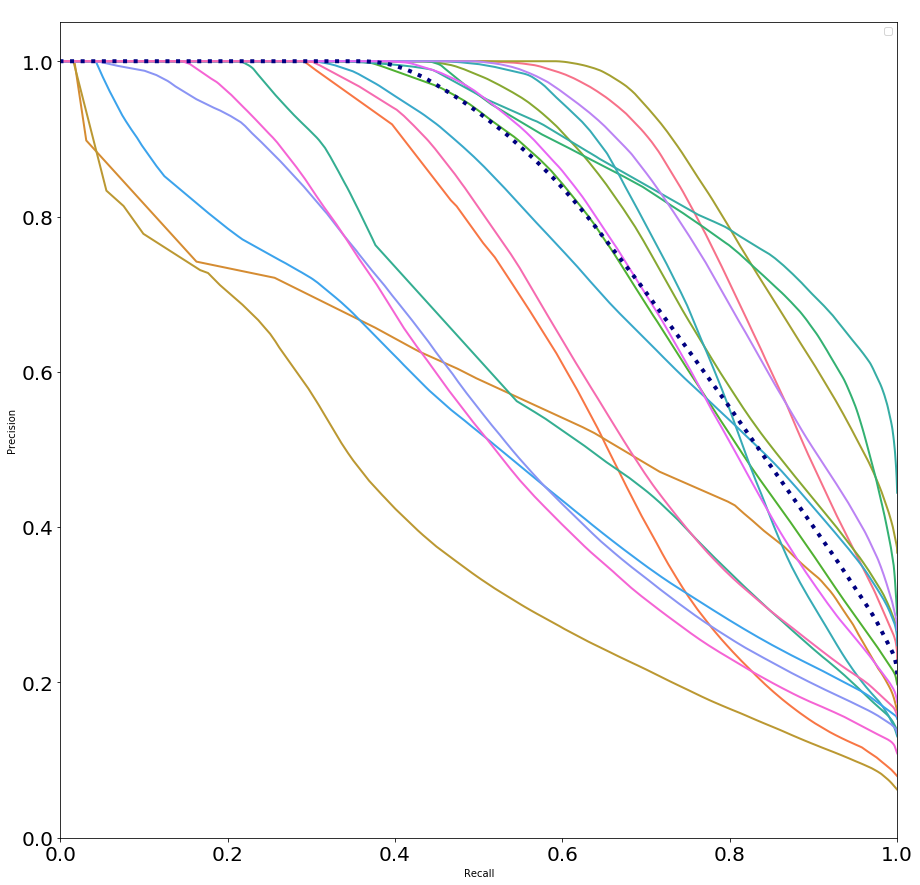

In [27]:
import matplotlib.pyplot as plt

_, labels = ax.get_legend_handles_labels()
labels = np.array(labels)

fig,ax=plt.subplots(figsize=(15,15))

labels=[i.replace('Precision-recall curve of class ', '') for i in labels]

skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, text_fontsize=20,ax=ax, title=' ')



plt.legend(labels)

plt.show()

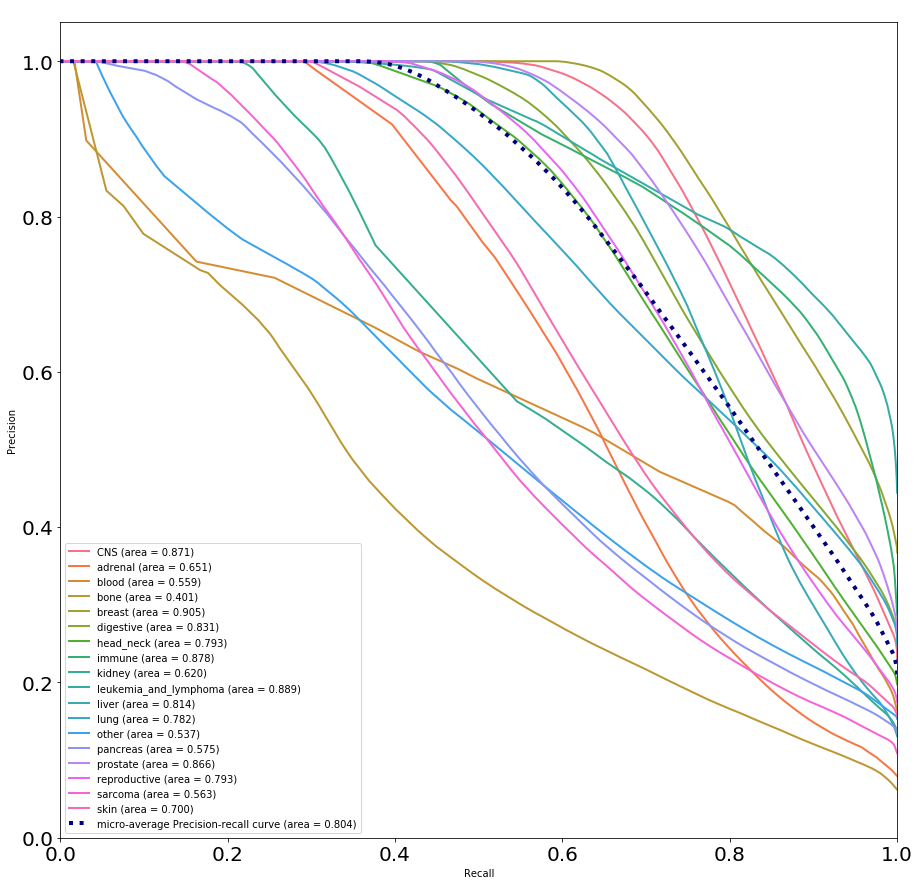

In [36]:
_, labels = ax.get_legend_handles_labels()
labels = np.array(labels)

fig,ax=plt.subplots(figsize=(15,15))

labels=[i.replace('Precision-recall curve of class ', '') for i in labels]

skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap=cmap, text_fontsize=20,ax=ax, title=' ')

plt.legend(labels)

plt.show()

/Users/harmeetgill/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


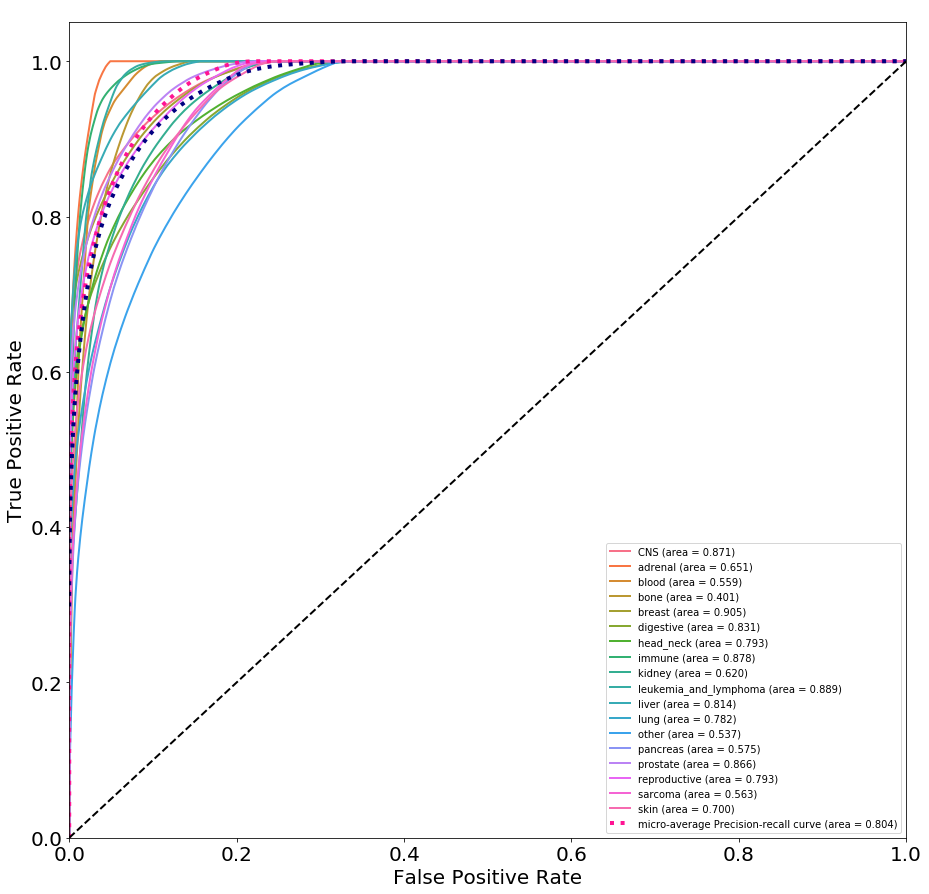

In [37]:

_, labels = ax.get_legend_handles_labels()
labels = np.array(labels)

fig,ax=plt.subplots(figsize=(15,15))

labels=[i.replace('Precision-recall curve of class ', '') for i in labels]

skplt.metrics.plot_roc_curve(y_train, probabilities_train, cmap=cmap, text_fontsize=20,ax=ax, title=' ')

plt.legend(labels)

plt.show()

/Users/harmeetgill/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


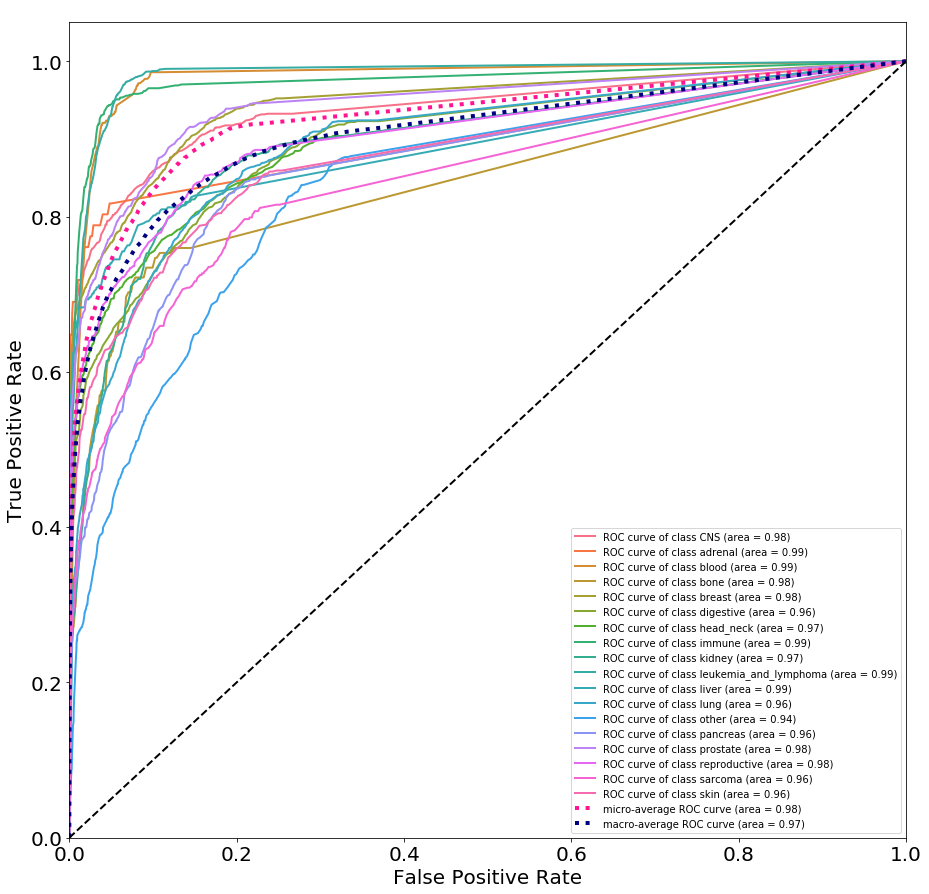

In [39]:
_, labels = ax.get_legend_handles_labels()
labels = np.array(labels)

fig,ax=plt.subplots(figsize=(15,15))

labels=[i.replace('Precision-recall curve of class ', '') for i in labels]

skplt.metrics.plot_roc_curve(y_test, probabilities_test, cmap=cmap, text_fontsize=20,ax=ax, title=' ')

plt.legend(labels)

plt.show()

#### Plotting coefficients

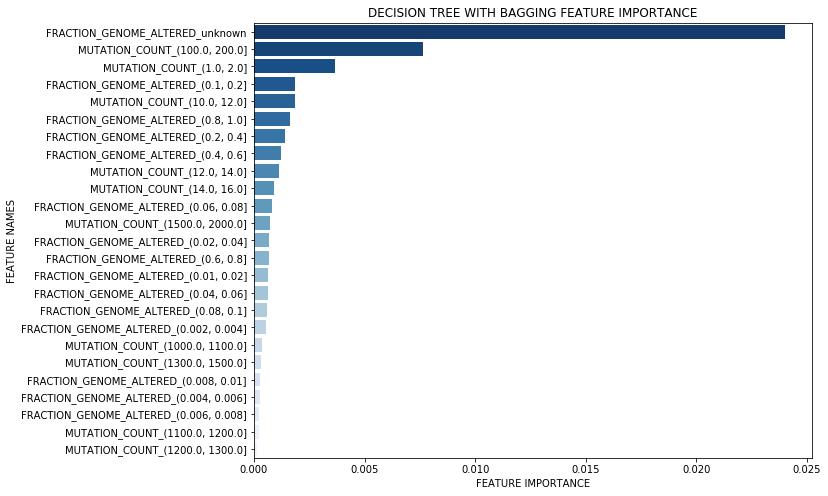

In [33]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data).head(25)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],palette='Blues_r')
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(dtc_grid_best.feature_importances_, X_train.columns, 'DECISION TREE WITH BAGGING ')